In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from alpha_vantage import timeseries as ts 
import datetime as dt 

# 10 year data form y finance

In [95]:
ticker = "ENPH"
start = dt.datetime.today() - dt.timedelta(10*365)
end = dt.datetime.today()
hist_data = yf.download(tickers = ticker, 
                           start = start,
                           end = end)

[*********************100%%**********************]  1 of 1 completed


In [96]:
hist_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-02,9.250000,9.350000,8.800000,9.070000,9.070000,784900
2014-07-03,9.100000,9.400000,9.020000,9.360000,9.360000,383800
2014-07-07,9.500000,9.960000,9.220000,9.250000,9.250000,985600
2014-07-08,9.340000,9.380000,8.800000,9.160000,9.160000,522000
2014-07-09,9.160000,9.340000,9.080000,9.260000,9.260000,312000
...,...,...,...,...,...,...
2024-06-24,106.919998,109.110001,104.550003,108.019997,108.019997,5093000
2024-06-25,106.940002,108.000000,101.519997,101.849998,101.849998,5617300
2024-06-26,101.360001,103.160004,100.410004,102.949997,102.949997,4486800


# Figure out how to play with dates. 

In [97]:
intraday = yf.download(ticker, period = "1d", interval = "5m")

[*********************100%%**********************]  1 of 1 completed


In [98]:
intraday

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-28 09:30:00-04:00,105.550003,105.550003,102.559998,102.879997,102.879997,277050
2024-06-28 09:35:00-04:00,102.989998,104.879997,102.974998,104.110001,104.110001,75635
2024-06-28 09:40:00-04:00,104.087502,104.300003,103.849998,104.065002,104.065002,60524
2024-06-28 09:45:00-04:00,104.129997,104.129997,103.400002,103.669998,103.669998,58101
2024-06-28 09:50:00-04:00,103.669998,103.800003,103.004997,103.669998,103.669998,119817
...,...,...,...,...,...,...
2024-06-28 15:35:00-04:00,98.720001,98.949997,98.699997,98.699997,98.699997,67289
2024-06-28 15:40:00-04:00,98.709999,99.059998,98.599998,98.980003,98.980003,92765
2024-06-28 15:45:00-04:00,99.010002,99.129997,98.830002,99.105003,99.105003,73284


In [99]:
intraday['ret'] = intraday['Adj Close'].pct_change()

In [100]:
# plot macd 

def macd(DF):
    df = DF.copy()
    ret = df['Adj Close'].pct_change()
    cumret = ret.cumprod()
    fast = ret.ewm(span = 12).mean()
    slow = ret.ewm(span = 26).mean()
    df['macd'] = fast - slow 
    df['signal'] = df['macd'].ewm(span = 9).mean()
    return df

<Axes: xlabel='Datetime'>

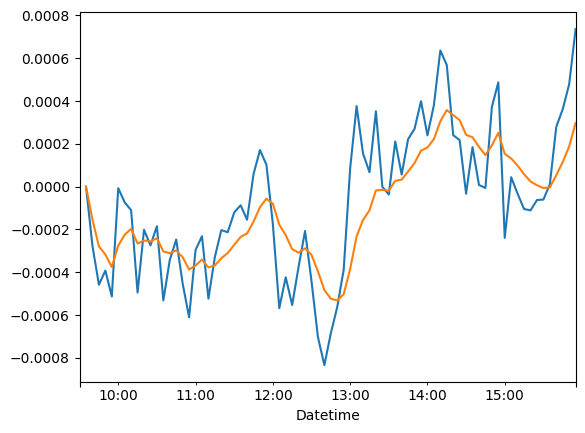

In [101]:
ohlcv_intraday = macd(intraday)
ohlcv_intraday['macd'].plot()
ohlcv_intraday['signal'].plot()
    

In [102]:
ohlcv_intraday

,Open,High,Low,Close,Adj Close,Volume,ret,macd,signal
Datetime,,,,,,,,,
2024-06-28 09:30:00-04:00,105.550003,105.550003,102.559998,102.879997,102.879997,277050,NaN,NaN,NaN
2024-06-28 09:35:00-04:00,102.989998,104.879997,102.974998,104.110001,104.110001,75635,0.011956,0.000000,0.000000
2024-06-28 09:40:00-04:00,104.087502,104.300003,103.849998,104.065002,104.065002,60524,-0.000432,-0.000278,-0.000154
2024-06-28 09:45:00-04:00,104.129997,104.129997,103.400002,103.669998,103.669998,58101,-0.003796,-0.000458,-0.000279
2024-06-28 09:50:00-04:00,103.669998,103.800003,103.004997,103.669998,103.669998,119817,0.000000,-0.000392,-0.000317
...,...,...,...,...,...,...,...,...,...
2024-06-28 15:35:00-04:00,98.720001,98.949997,98.699997,98.699997,98.699997,67289,0.000152,0.000011,-0.000003
2024-06-28 15:40:00-04:00,98.709999,99.059998,98.599998,98.980003,98.980003,92765,0.002837,0.000280,0.000053
2024-06-28 15:45:00-04:00,99.010002,99.129997,98.830002,99.105003,99.105003,73284,0.001263,0.000362,0.000115


In [103]:
def CAGR(df, timescale):
    "compounded annual growth ratio"
    cumret = (1+df['ret']).cumprod()
    n = len(df)/timescale
    cagr = (cumret.iloc[-1])**(1/n) - 1 
    return cagr

CAGR(ohlcv_intraday, 252)

-0.09617024221110648

In [104]:
ticker_signal = ""
ticker_ret = [0]
nrows = ohlcv_intraday.shape[0]
close = ohlcv_intraday["Adj Close"]
high_avg = ohlcv_intraday["High"].rolling(20).mean()
data = ohlcv_intraday

for i in range(1,nrows):
    prev = data.iloc[i-1]
    curr = data.iloc[i]

    # Buy conditions :
    # 1. Buy only if the closing price is lesser than 0.8*(rolling avg of high price for 20 periods) 
    # 2. Buy only if current macd is greater than the current signal
    # 3. Projected slope is increasing - not yet
    
    buycond1 = [curr['macd'] >= curr['signal'],
               close[i] < high_avg[i]
              ]

    # sell conditions :
    # sell for profit 
    # 1. sell only when close price is higher than 1.5 * high_rolling_avg 
    # 2. current macd value is less than 1.5 times the signal value
    
    sellcond1 = [curr['macd'] < 1.5 * curr['signal'],
                close[i] > 1.5 * high_avg[i]]
    
    if ticker_signal == "":
        ticker_ret.append(0)
        if all(buycond1) == True:
            print("buying")
            ticker_signal = "Buy"
        elif all(sellcond1) == True:
            print("selling")
            ticker_signal = "Sell"

    elif ticker_signal == "Buy":
        ticker_ret.append(data.iloc[i]['ret'])
        keep_signal = curr["macd"] >= curr["signal"] and curr['macd'] > prev['macd']
        sell_signal = curr["macd"] < curr["signal"] and curr['macd'] < prev['macd']
        if keep_signal:
            print("keeping")
            ticker_signal = ""
        elif sell_signal:
            print("selling")
            ticker_signal = "Sell"

    elif ticker_signal == "Sell":
        ticker_ret.append(data.iloc[i]['ret'])
        keep_signal = curr["macd"] < curr["signal"] # and slope as well. 
        buy_signal = curr["macd"] == curr["signal"] and (close[i] - high_avg[i]).pct_change() < 5 and  (close[i] - high_avg[i]).pct_change() > 0
        if keep_signal:
            print("keeping")
            ticker_signal = ""
        elif buy_signal:
            print("buying")
            ticker_signal = "Buy"
            
ohlcv_intraday["buy_sell_ret"] = ticker_ret 


buying
selling
keeping
buying
selling
keeping
buying
keeping
buying
keeping
buying
selling
keeping
buying
keeping
buying
keeping
buying
keeping


/var/folders/tg/qr_8l5d93cnc0vvkxbf_yp5r0000gp/T/ipykernel_1130/39437513.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  close[i] < high_avg[i]
/var/folders/tg/qr_8l5d93cnc0vvkxbf_yp5r0000gp/T/ipykernel_1130/39437513.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  close[i] > 1.5 * high_avg[i]]


In [105]:
ohlcv_intraday["buy_sell_ret"]

Datetime
2024-06-28 09:30:00-04:00    0.000000
2024-06-28 09:35:00-04:00    0.000000
2024-06-28 09:40:00-04:00    0.000000
2024-06-28 09:45:00-04:00    0.000000
2024-06-28 09:50:00-04:00    0.000000
                               ...   
2024-06-28 15:35:00-04:00    0.000000
2024-06-28 15:40:00-04:00    0.002837
2024-06-28 15:45:00-04:00    0.000000
2024-06-28 15:50:00-04:00    0.001968
2024-06-28 15:55:00-04:00    0.000000
Name: buy_sell_ret, Length: 78, dtype: float64

In [106]:
data.iloc[4]['ret']

0.0

<Axes: xlabel='Datetime'>

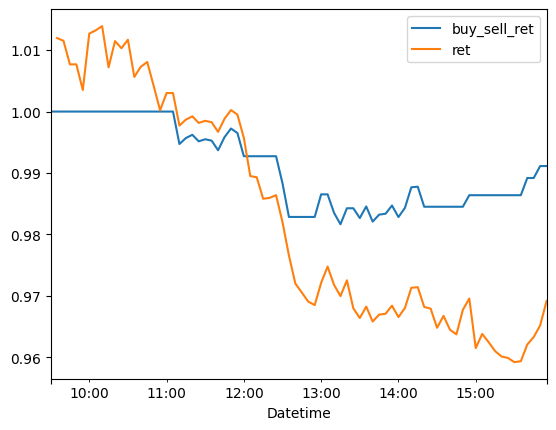

In [107]:
(1+ohlcv_intraday[["buy_sell_ret","ret"]]).cumprod().plot()

In [94]:
cagr_strategy = ((1 + ohlcv_intraday["buy_sell_ret"]).cumprod()[-1])**(1/272) - 1
cagr_strategy

/var/folders/tg/qr_8l5d93cnc0vvkxbf_yp5r0000gp/T/ipykernel_1130/375601140.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr_strategy = ((1 + ohlcv_intraday["buy_sell_ret"]).cumprod()[-1])**(1/272) - 1


-0.0009716407284491302